In [2]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import os
import sys
from IPython.display import display
import seaborn as sns
import scipy

plt.style.use("ggplot")
%matplotlib inline

In [3]:
os.chdir('/Users/yamadakanato/program/python/stocks/')

In [4]:
df = pd.read_csv("data/usdjpy_d.csv")

### シミュレーション

#### 条件

- 初期資産 : ¥1,000,000
- 投資期間 : 2010 ~ 2017/XX
- 手数料 : ¥0
- ロット(為替) : 100通貨
- ロット(株式) : 対象の最小ロットに準ずる.
- 一週間(5営業日)所持し,売却を行う.
- 空売りは無し.
- 最終取引日に所持しているポジションは時価で算出を行う.

In [9]:
display(df.head())
display(df.tail())
display(df.describe())

,Date,Open,High,Low,Close
0,2001-01-01,114.35,114.61,114.30,114.57
1,2001-01-02,114.33,115.06,114.21,114.45
2,2001-01-03,114.36,114.66,113.55,113.60
3,2001-01-04,113.57,115.75,113.52,115.68
4,2001-01-05,115.62,116.88,115.47,116.54


,Date,Open,High,Low,Close
4346,2017-09-28,112.810,113.200,112.256,112.314
4347,2017-09-29,112.315,112.727,112.220,112.508
4348,2017-10-02,112.517,113.056,112.510,112.723
4349,2017-10-03,112.723,113.196,112.665,112.891
4350,2017-10-04,112.888,112.938,112.326,112.789


,Open,High,Low,Close
count,4351.000000,4351.000000,4351.000000,4351.000000
mean,106.052372,106.517146,105.540359,106.047786
std,14.340136,14.373242,14.303096,14.338144
min,75.750000,76.000000,75.570000,75.820000
25%,96.602500,97.395000,95.791500,96.642500
50%,108.860000,109.405000,108.380000,108.860000
75%,117.873000,118.373500,117.415000,117.870000
max,134.990000,134.990000,134.280000,134.870000


In [10]:
# 2010初頭〜
# df.iloc[2338:]

In [108]:
moneys = []
for x in range(100):
    money = 1000000
    cost = 0
    lot = 100
    position = []

    for i, price in enumerate(df.Close[2338:]):        
        # 買う
        if random.random() < 0.1:
            lots = round(random.random()*(money/lot*0.5))
            # lots = round(0.01*(money/lot*0.5))
        # 買わない
        else:
            lots = 0

        money -= lots * price
        position.append(lots)
        # 開始１週間以降
        if i > 4:
            money += position[i-5] * price
        j = i
    
    # 最終取引日に所持しているポジションを売却
    for lots in position[j:]:
        money += df.Close.iloc[-1] * lots
    
    moneys.append(money)

In [120]:
moneys = pd.Series(moneys)
print("平均値: %s" % moneys.mean())
print("中央値: %s" % moneys.median())
print("分散: %s" % moneys.var())
print("標準偏差: %s" % moneys.std())
print("最大値: %s" % moneys.max())
print("最小値: %s" % moneys.min())

平均値: 912991.7748399999
中央値: 987929.3934999998
分散: 32447660652.87961
標準偏差: 180132.34205128075
最大値: 1141112.9519999996
最小値: 348380.0660000001


(array([ 3.,  2.,  4.,  3.,  3., 10.,  4., 19., 42., 10.]),
 array([ 348380.066 ,  427653.3546,  506926.6432,  586199.9318,
         665473.2204,  744746.509 ,  824019.7976,  903293.0862,
         982566.3748, 1061839.6634, 1141112.952 ]),
 <a list of 10 Patch objects>)

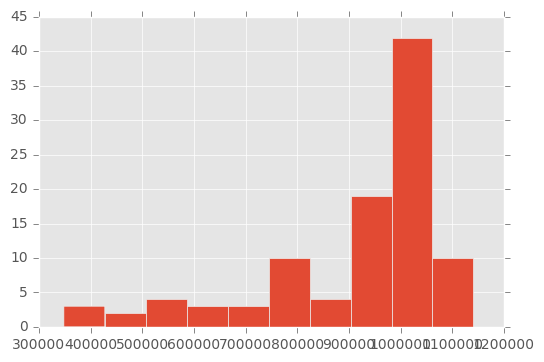

In [110]:
plt.hist(moneys)

In [117]:
moneys = pd.Series(moneys)

In [118]:
moneys.describe()

count    1.000000e+02
mean     9.129918e+05
std      1.801323e+05
min      3.483801e+05
25%      8.330078e+05
50%      9.879294e+05
75%      1.024510e+06
max      1.141113e+06
dtype: float64